# Imports and definitions

In [151]:
import datetime
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt


from ribbonline.tweet import Tweet, TweetCollection
from ribbonline.opinion import DailyOpinionSplit, OpinionTimeline, OpinionController
from ribbonline.loader import TweetCSVLoader
from ribbonline.clean import OnePerUserCleaner

%autoreload 2
%matplotlib inline

In [134]:
def plot_opinion_splits(opinion_splits, neutral_factor=0.1):
    splits_array = np.array([split.list for split in opinion_splits])
    splits_array[:,2] = splits_array[:,2] * neutral_factor
    daily_sums = splits_array.sum(axis=1)
    ribbon_in_tweet = splits_array[:,0]/daily_sums[:]
    ribbon_in_username = splits_array[:,1]/daily_sums[:]
    neutral = splits_array[:,2]/daily_sums[:]
    flag_in_username = splits_array[:,3]/daily_sums[:]
    flag_in_tweet = splits_array[:,4]/daily_sums[:]
    N = len(ribbon_in_tweet)

    ind = np.arange(N)    # the x locations for the groups
    width = 1       # the width of the bars: can also be len(x) sequence

    plt.figure(figsize=(8,8))
    p1 = plt.bar(ind, ribbon_in_tweet, width, color='#fffb11')
    p2 = plt.bar(ind, ribbon_in_username, width, color='#eae68f',
                 bottom=ribbon_in_tweet)
    p3 = plt.bar(ind, neutral, width, color='0',
                 bottom=ribbon_in_tweet+ribbon_in_username)
    p4 = plt.bar(ind, flag_in_username, width, color='#e58c80',
                 bottom=ribbon_in_tweet+ribbon_in_username+neutral)
    p5 = plt.bar(ind, flag_in_tweet, width, color='#ff1d00',
                 bottom=ribbon_in_tweet+ribbon_in_username+neutral+flag_in_username)

    #plt.ylabel('Tweet ratio')
    plt.title('Tweet ratio')
    plt.xticks([])
    plt.yticks([])
    plt.legend(
        (p5[0], p5[0], p2[0], p1[0]), 
        ('Flag in tweet',
         'Flag in username',
         'Ribbon in username',
         'Ribbon in tweet'
        ))

    plt.show()

# Load data

In [168]:
paths = [
    'crawls/crawl_20181201202939_2017-09-01_2018-11-30_#catalunya/tweets.csv',
    'crawls/crawl_20181201203016_2017-09-01_2018-11-30_#cataluña/tweets.csv'
]
loader = TweetCSVLoader()
tweets = loader.load_multiple(paths)

# Limit to one tweet per user, day and category

In [163]:
cleaner = OnePerUserCleaner(tweets)
clean_tweets = cleaner.clean()

# Create timeline

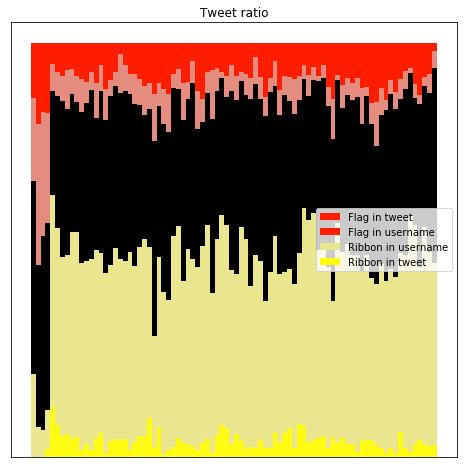

In [166]:
opinion_ctrl = OpinionController()
timeline = opinion_ctrl.create_timeline(clean_tweets)
plot_opinion_splits(timeline)

# Stuff

In [167]:
cleaner._unique_keys

['886570056_2018-11-30_NU',
 '929080029945921537_2018-11-30_NU',
 '923980829994487808_2018-11-30_NU',
 '1917922026_2018-11-30_RU',
 '202240947_2018-11-30_NU',
 '3225999715_2018-11-30_NU',
 '2786903139_2018-11-30_NU',
 '312668566_2018-11-30_NU',
 '947515634316992513_2018-11-30_NU',
 '847502439469072385_2018-11-30_NU',
 '931935204343779329_2018-11-30_NU',
 '45632733_2018-11-30_NU',
 '395479122_2018-11-30_NU',
 '2759428932_2018-11-30_NU',
 '135271939_2018-11-30_NU',
 '306055083_2018-11-29_NU',
 '915929237328203777_2018-11-29_NU',
 '29679074_2018-11-29_NU',
 '16423091_2018-11-29_NU',
 '910563673948684288_2018-11-29_NU',
 '736701397798932481_2018-11-29_RU',
 '934537786509746177_2018-11-29_RU',
 '1029372099880779779_2018-11-29_NU',
 '183461160_2018-11-29_NU',
 '428264271_2018-11-29_OT',
 '138873138_2018-11-29_NU',
 '542640808_2018-11-29_NU',
 '719447432707313664_2018-11-29_NU',
 '48490494_2018-11-29_NU',
 '3225999715_2018-11-29_NU',
 '929080029945921537_2018-11-29_NU',
 '66133861_2018-11-29_

In [105]:
start_date = datetime.datetime(2018, 9, 1)
end_date = datetime.datetime(2018, 12, 1)
opinion_splits = []

since = start_date
while since < end_date:
    until = since + datetime.timedelta(1)
    print((since,until))
    daily_tweets = tweets.filter_by_dates(since, until)
    opinion_splits.append(DailyOpinionSplit(since, daily_tweets))
    since += datetime.timedelta(1)

(datetime.datetime(2018, 9, 1, 0, 0), datetime.datetime(2018, 9, 2, 0, 0))
(datetime.datetime(2018, 9, 2, 0, 0), datetime.datetime(2018, 9, 3, 0, 0))
(datetime.datetime(2018, 9, 3, 0, 0), datetime.datetime(2018, 9, 4, 0, 0))
(datetime.datetime(2018, 9, 4, 0, 0), datetime.datetime(2018, 9, 5, 0, 0))
(datetime.datetime(2018, 9, 5, 0, 0), datetime.datetime(2018, 9, 6, 0, 0))
(datetime.datetime(2018, 9, 6, 0, 0), datetime.datetime(2018, 9, 7, 0, 0))
(datetime.datetime(2018, 9, 7, 0, 0), datetime.datetime(2018, 9, 8, 0, 0))
(datetime.datetime(2018, 9, 8, 0, 0), datetime.datetime(2018, 9, 9, 0, 0))
(datetime.datetime(2018, 9, 9, 0, 0), datetime.datetime(2018, 9, 10, 0, 0))
(datetime.datetime(2018, 9, 10, 0, 0), datetime.datetime(2018, 9, 11, 0, 0))
(datetime.datetime(2018, 9, 11, 0, 0), datetime.datetime(2018, 9, 12, 0, 0))
(datetime.datetime(2018, 9, 12, 0, 0), datetime.datetime(2018, 9, 13, 0, 0))
(datetime.datetime(2018, 9, 13, 0, 0), datetime.datetime(2018, 9, 14, 0, 0))
(datetime.dateti

In [111]:
def plot_opinion_splits(opinion_splits, neutral_factor=0.1):
    splits_array = np.array([split.list for split in opinion_splits])
    splits_array[:,2] = splits_array[:,2] * neutral_factor
    daily_sums = splits_array.sum(axis=1)
    ribbon_in_tweet = splits_array[:,0]/daily_sums[:]
    ribbon_in_username = splits_array[:,1]/daily_sums[:]
    neutral = splits_array[:,2]/daily_sums[:]
    flag_in_username = splits_array[:,3]/daily_sums[:]
    flag_in_tweet = splits_array[:,4]/daily_sums[:]
    N = len(ribbon_in_tweet)

    ind = np.arange(N)    # the x locations for the groups
    width = 1       # the width of the bars: can also be len(x) sequence

    plt.figure(figsize=(8,8))
    p1 = plt.bar(ind, ribbon_in_tweet, width, color='#fffb11')
    p2 = plt.bar(ind, ribbon_in_username, width, color='#eae68f',
                 bottom=ribbon_in_tweet)
    p3 = plt.bar(ind, neutral, width, color='0',
                 bottom=ribbon_in_tweet+ribbon_in_username)
    p4 = plt.bar(ind, flag_in_username, width, color='#e58c80',
                 bottom=ribbon_in_tweet+ribbon_in_username+neutral)
    p5 = plt.bar(ind, flag_in_tweet, width, color='#ff1d00',
                 bottom=ribbon_in_tweet+ribbon_in_username+neutral+flag_in_username)

    #plt.ylabel('Tweet ratio')
    plt.title('Tweet ratio')
    plt.xticks([])
    plt.yticks([])
    plt.legend(
        (p5[0], p5[0], p2[0], p1[0]), 
        ('Flag in tweet',
         'Flag in username',
         'Ribbon in username',
         'Ribbon in tweet'
        ))

    plt.show()

In [159]:
tweet = tweets[0]
tweet.__class__

ribbonline.tweet.Tweet

In [104]:
[emoji.emojize(t.text) for t in tweets.text_has_flag[:50]]

['#Cataluña #Spain #Espagne 🇪🇸 #Catalunya #Katalonien #Catalogne #catalan https://twitter.com/ruben_usa/status/1068226828874199040\xa0…',
 '#Cataluña #Spain #Espagne 🇪🇸 #Catalunya #Katalonien #Catalogne #catalan https://twitter.com/escribano83/status/1068227303451361282\xa0…',
 '#Cataluña #Spain #Espagne 🇪🇸 #Catalunya #Katalonien #Catalogne #catalan https://twitter.com/pimientoman/status/1068221210159472645\xa0…',
 ' https://elpais.com/internacional/2018/04/29/actualidad/1525015344_341405.html\xa0… #Cataluña #Spain #Espagne 🇪🇸 #Catalunya #Katalonien #Catalogne #catalan',
 'Y critican a Arrimadas por irse a Andalucía a defender sus ideas! #Cataluña #Spain #Espagne 🇪🇸 #Catalunya #Katalonien #Catalogne #catalan https://twitter.com/spara2nunkat/status/1067794085656911872\xa0…',
 '#Cataluña #Spain #Espagne 🇪🇸 #Catalunya #Katalonien #Catalogne #catalan https://twitter.com/manuelgarcavil4/status/1068083822166716421\xa0…',
 '#Cataluña #Spain #Espagne 🇪🇸 #Catalunya #Katalonien #Catalogne #catal

In [126]:
some_tweets.end_date

datetime.datetime(2018, 11, 30, 0, 0)

In [124]:
min([t.date for t in some_tweets.tweets])

datetime.datetime(2018, 11, 29, 0, 0)

In [147]:
f'{since.date()}'

'2018-09-01'

In [148]:
sum([False, True, True])

2